#Intro to Google's BigQuery

In [ ]:
import pandas as pd
from google.cloud import bigquery

#Using Bigquery with Cloud API

In [ ]:
from google.colab import auth

auth.authenticate_user()

In [ ]:
project_id = 'sqlkaggleintro'
client = bigquery.Client(project=project_id)

##Create dataset reference
  1. We begin by constructing a reference to the dataset with the dataset() method.
  2. Next, we use the get_dataset() method, along with the reference we just constructed, to fetch the dataset.

In [ ]:
# Construct a reference to the "hacker_news" dataset (dataset publico do google cloud: https://cloud.google.com/bigquery/public-data and go to market place)
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [ ]:
dataset_ref

DatasetReference('bigquery-public-data', 'hacker_news')

In [ ]:
# Extract project attribute
dataset_ref.project

'bigquery-public-data'

## Print Tables

In [ ]:
# As you can see its a 'iterator', so you can turn it in to a list
client.list_tables(dataset)

In [ ]:
#Create variable to hold tables
tables = list(client.list_tables(dataset))

In [ ]:
# Preview properties / attributes of one of the tables (dicionários)
tables[0].__dict__

{'_properties': {'kind': 'bigquery#table',
  'id': 'bigquery-public-data:hacker_news.comments',
  'tableReference': {'projectId': 'bigquery-public-data',
   'datasetId': 'hacker_news',
   'tableId': 'comments'},
  'type': 'TABLE',
  'creationTime': '1457746703736'}}

In [ ]:
#Print the tables in dataset
for table in tables:
  print(table.table_id)

comments
full
full_201510
stories


## Create reference to a table
  1. Similar to how we fetched a dataset, we can fetch a table. In the code cell below, we fetch the full table in the hacker_news dataset.

In [ ]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

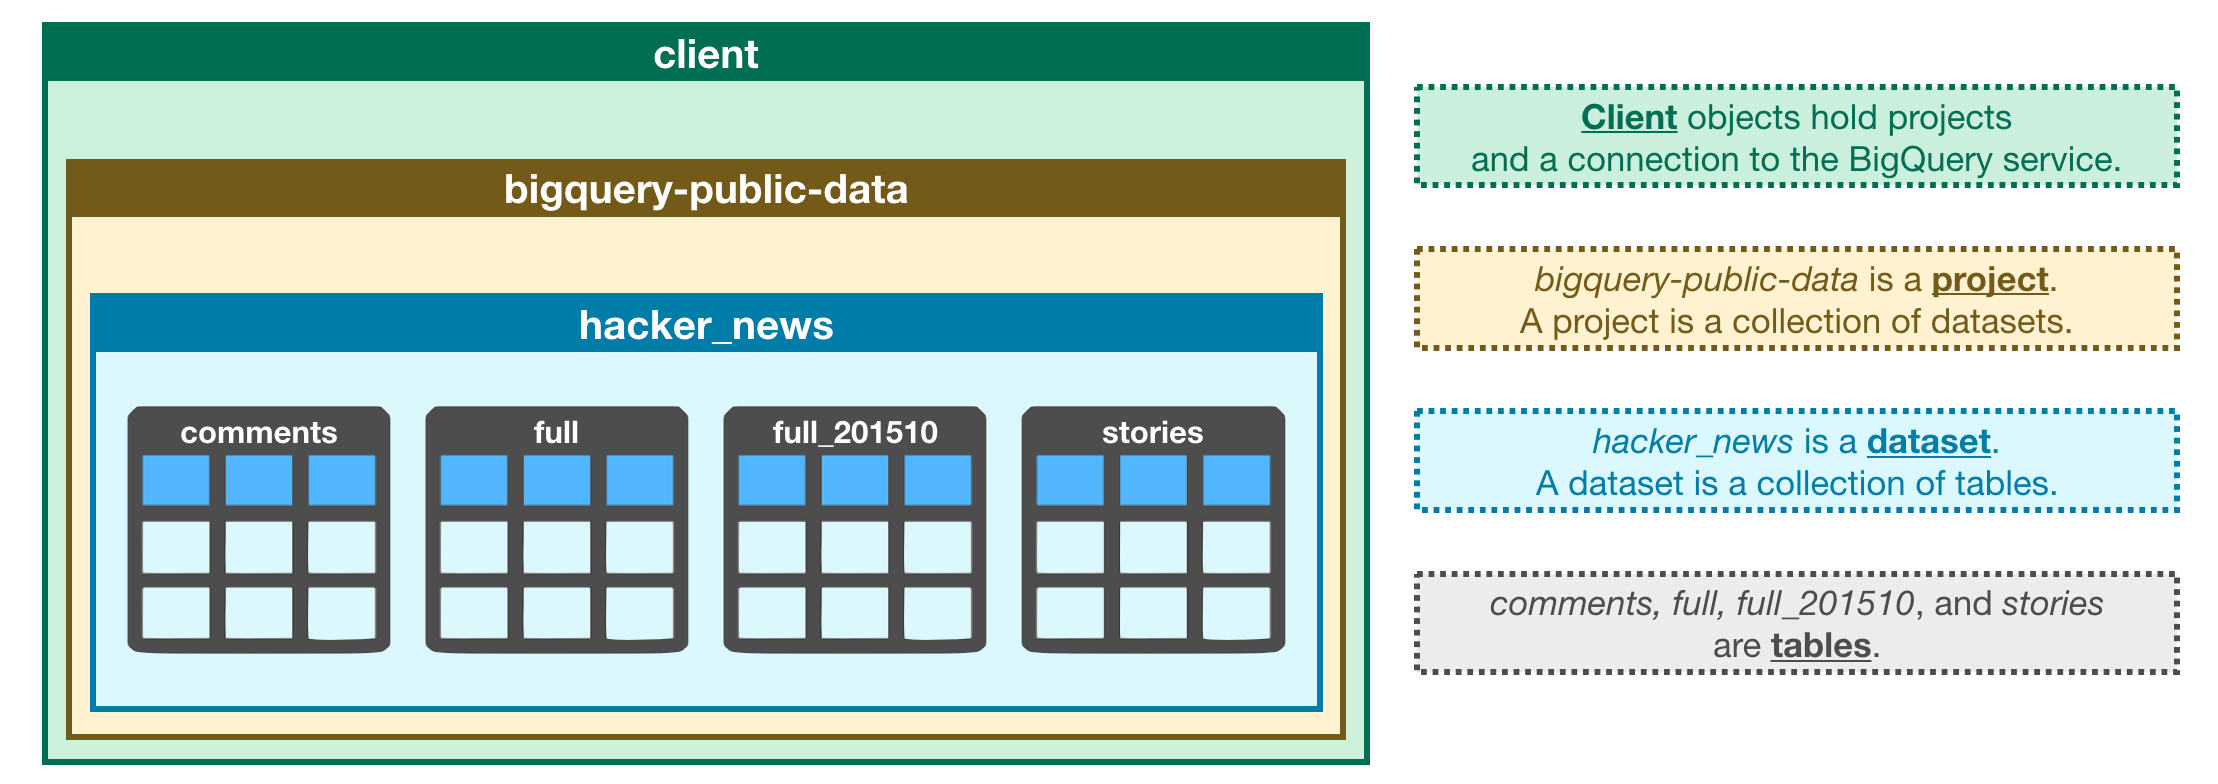

## Table schema
  The structure of a table is called its **schema**. We need to understand a table's schema to effectively pull out the data we want.
  
  In this example, we'll investigate the full table that we fetched above.

In [ ]:
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', ()),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', ()),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", ()),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', ()),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', ()),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", ()),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', ()),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', ()),
 SchemaField('ranking', 'INTEGER', 'NULLABLE', 'Comment ranking', ()),
 SchemaField(

Each **SchemaField** tells us about a specific column (which we also refer to as a field). In order, the information is:


* The name of the column
* The field type (or datatype) in the column  
* The mode of the column ('NULLABLE' means that a column allows NULL values, and is the default)
* A description of the data in that columnItem

For example:

SchemaField('by', 'string', 'NULLABLE', "The username of the item's author.",())

This tells us:

  - the field (or column) is called by,
  - the data in this field is strings,
  - NULL values are allowed, and it contains the usernames corresponding to each item's author.

In [ ]:
# To see the rows we can convert to something similar to pandas data frame
client.list_rows(table, max_results = 5).to_dataframe()


,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,What debate is &quot;surrounding rape&quot; ex...,None,detcader,None,1370666958,2013-06-08 04:49:18+00:00,comment,5843851,5843406,None,None,None
1,None,None,"&gt; But management freaked out, forbade Go in...",None,dgb23,None,1653580273,2022-05-26 15:51:13+00:00,comment,31519852,31518845,None,None,None
2,None,None,"I think that would be an agent, which would ba...",None,softwaredoug,None,1626309256,2021-07-15 00:34:16+00:00,comment,27840199,27838939,None,None,None
3,None,None,Anyone have money but not enough Time? I see M...,None,deregulateMed,None,1626309246,2021-07-15 00:34:06+00:00,comment,27840198,27839516,None,None,None
4,None,None,"Ehhh, if a store is the analogy, YouTube is ch...",None,sib,None,1626309242,2021-07-15 00:34:02+00:00,comment,27840197,27837222,None,None,None


In [ ]:
# Para indexar o schema e trazer colunas específicas (01 a 03) utilize 'selected_fields = '
client.list_rows(table, selected_fields=table.schema[:3], max_results=10).to_dataframe()

,title,url,text
0,None,None,What debate is &quot;surrounding rape&quot; ex...
1,None,None,"&gt; But management freaked out, forbade Go in..."
2,None,None,"I think that would be an agent, which would ba..."
3,None,None,Anyone have money but not enough Time? I see M...
4,None,None,"Ehhh, if a store is the analogy, YouTube is ch..."
5,None,None,&gt; Damaged kids become damaged adults<p>I st...
6,None,None,"Like using, say, an AWS Workspace?<p>This isn&..."
7,None,None,No you can&#x27;t. But you don&#x27;t have to ...
8,None,None,He does mention his ideal door has a plate on ...
9,None,None,Simplifying dieting down to calories in calori...


## Exercício 01:


In [ ]:
# Construct a reference to the "chicago_crime" dataset
dataset_chicago_ref = client.dataset("chicago_crime", project="bigquery-public-data")

# API request - fetch the dataset
chicago_dataset = client.get_dataset(dataset_chicago_ref)

### 01) Count the tables in dataset

In [ ]:
#Create a list of tables from the dataset 
tables_list = list(client.list_tables(chicago_dataset))
tables = []

for table in tables_list:
  tables.append(table.table_id)

num_tables = len(tables)
num_tables

1

### 02) Explore the table Schema
  How many columns in the crime table have TIMESTAMP data?

In [ ]:
# Access the 'crime' table
chicago_table_ref = dataset_chicago_ref.table('crime')

## API request - fetch (procurar) the table
chicago_table = client.get_table(chicago_table_ref)

#View the columns of the table:
chicago_table.schema

[SchemaField('unique_key', 'INTEGER', 'REQUIRED', None, ()),
 SchemaField('case_number', 'STRING', 'NULLABLE', None, ()),
 SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('block', 'STRING', 'NULLABLE', None, ()),
 SchemaField('iucr', 'STRING', 'NULLABLE', None, ()),
 SchemaField('primary_type', 'STRING', 'NULLABLE', None, ()),
 SchemaField('description', 'STRING', 'NULLABLE', None, ()),
 SchemaField('location_description', 'STRING', 'NULLABLE', None, ()),
 SchemaField('arrest', 'BOOLEAN', 'NULLABLE', None, ()),
 SchemaField('domestic', 'BOOLEAN', 'NULLABLE', None, ()),
 SchemaField('beat', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('district', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('ward', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('community_area', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('fbi_code', 'STRING', 'NULLABLE', None, ()),
 SchemaField('x_coordinate', 'FLOAT', 'NULLABLE', None, ()),
 SchemaField('y_coordinate', 'FLOAT', 'NULLABLE', 

### 03) Create a crime map
  If you wanted to create a map with a dot at the location of each crime, what are the names of the two fields you likely need to pull out of the crime table to plot the crimes on a map?

In [ ]:
#Para plotar em um mapa provavelmente seriam as colunas 'latitude' e 'longitude'
fields_for_plotting = ['latitude', 'longitude']


# Select, From & Where (Módulo 02)

In [ ]:
# Construct a reference to the "openaq" dataset
openaq_dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
openaq_dataset = client.get_dataset(openaq_dataset_ref)

# List all the tables in the "openaq" dataset
openaq_tables = list(client.list_tables(openaq_dataset))

# Print name of all the tables in the dataset (veremos que existe apenas 01)
for table in openaq_tables:  
    print(table.table_id)

global_air_quality


In [ ]:
# Reference global_air_quality table
openaq_table_ref = openaq_dataset_ref.table('global_air_quality')

## API request - fetch (procurar) the table
gaq_table = client.get_table(openaq_table_ref)

#View the columns of the table:
client.list_rows(gaq_table, max_results = 5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)


##Our first query
select all the values from the 'city' column that are in rows where the 'country' column is 'us'

In [ ]:
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

###Submit the query
  Use the same client

In [ ]:
#Set up the query
query_job  = client.query(query)

# API request to run the query and return in pandas dataframe
us_cities = query_job.to_dataframe()


In [ ]:
us_cities.head()

,city
0,HOWARD
1,HOWARD
2,HOWARD
3,HOWARD
4,HOWARD


In [ ]:
# What five cities have the most measurementes? Just like in pandas we do:
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     39414
Los Angeles-Long Beach-Santa Ana            27479
Riverside-San Bernardino-Ontario            26887
New York-Northern New Jersey-Long Island    25417
San Francisco-Oakland-Fremont               22710
Name: city, dtype: int64

#### More queries

In [ ]:
query2 = """
        SELECT city, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

In [ ]:
query_job2 = client.query(query2)
query_job2.to_dataframe().head()

,city,country
0,HOWARD,US
1,HOWARD,US
2,HOWARD,US
3,Elkhart-Goshen,US
4,HOWARD,US


**Working with Big Datasets**



In [ ]:
# Query to get the score column from every row where the type column has value "job"
query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job" 
        """

# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 540815782 bytes.


**Limit how much you can scan**

In [ ]:
# Only run the query if it's less than 1 GB
ONE_MB = 1000*1000*1000

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_MB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
safe_query_job.to_dataframe()

,score,title
0,1.0,Make School Is Hiring for Admissions and Busin...
1,1.0,Rails Engineer needed to help modernize restau...
2,1.0,Teespring (YC W13) Is Hiring a DevOps Lead
3,1.0,"Clojure, Rust and C at Wit.ai"
4,1.0,Teespring is looking for a product designer an...
...,...,...
15659,8.0,Video Encoding Engineer @ Zencoder
15660,9.0,Web Designer @ Zencoder
15661,10.0,500Friends (w2010) is hiring Ruby on Rails Hac...
15662,15.0,Missed Work at a Startup but still want to wor...


###Exercício 02:


#### 1) Units of measurement
Which countries have reported pollution levels in units of "ppm"? In the code cell below, set first_query to an SQL query that pulls the appropriate entries from the country column.

In [ ]:
#Query to select countris with units of 'ppm'
first_query = """
              SELECT DISTINCT country
              FROM `bigquery-public-data.openaq.global_air_quality`
              WHERE unit = 'ppm' 
              """
              
#Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
first_query_job = client.query(first_query, job_config = safe_config)

#API request - run the query and return a pandas Dataframe
first_results = first_query_job.to_dataframe()

# View
first_results.head()

,country
0,AR
1,IL
2,TW
3,CO
4,EC


#### 2) High air quality
Which pollution leves were reported to be '0' ?
**Observação: comando WHERE sempre é o FILTRO**

In [ ]:
zero_pollution_query =  """
                      SELECT *
                      FROM `bigquery-public-data.openaq.global_air_quality`
                      WHERE value = 0
                      """

#Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
sec_query_job = client.query(zero_pollution_query, job_config = safe_config)

#API request - run the query and return a pandas Dataframe
pollution_results = sec_query_job.to_dataframe()

# View
pollution_results.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Zielonka, Bory Tucholskie",Zielonka,PL,bc,0.0,2022-04-29 14:00:00+00:00,µg/m³,GIOS,1.0,53.662136,17.933986,POINT(53.662136 1)
1,"Toruń, ul. Przy Kaszowniku",Toruń,PL,bc,0.0,2022-04-19 04:00:00+00:00,µg/m³,GIOS,1.0,53.017628,18.612808,POINT(53.017628 1)
2,"Kielce, ul. Targowa",Kielce,PL,bc,0.0,2022-05-07 17:00:00+00:00,µg/m³,GIOS,1.0,50.878998,20.633692,POINT(50.878998 1)
3,"Zielonka, Bory Tucholskie",Zielonka,PL,bc,0.0,2022-05-19 14:00:00+00:00,µg/m³,GIOS,1.0,53.662136,17.933986,POINT(53.662136 1)
4,"Koszalin, ul. Armii Krajowej",Koszalin,PL,bc,0.0,2022-05-12 20:00:00+00:00,µg/m³,GIOS,1.0,54.193986,16.172544,POINT(54.193986 1)


## Group By, Having & Count
Get more interesting insights directly from your SQL queries.

- Count: é um exemplo de uma função de agregação em que seleciona vários valores e retorna um valor único.  
- Group By: Uma instrução GROUP BY especifica que uma L SELECT divide linhas de resultados em grupos, com base em seus valores em uma ou várias colunas. Normalmente, o agrupamento é usado para aplicar algum tipo de função de agregação para cada grupo.
- Having: é usado em combinação com o GROUP BY para ignorar grupos que nao encaixam em certo critério

In [ ]:
# reference hacker_news dataset from the bigquery-public-data project

hn_dataset_ref = client.dataset('hacker_news', project = 'bigquery-public-data')

# fetch the dataset (api request)
hn_dataset = client.get_dataset(hn_dataset_ref)

#reference comments table
comments_table_ref = hn_dataset_ref.table ('comments')

# fetch the comments table (api request)
comments_table = client.get_table(comments_table_ref)

# preview the first 5 rows of the table
client.list_rows (comments_table, max_results = 5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


**Create first query**
Vamos usar a tabela para ver quais comentários geraram mais respostas. Desde:

a coluna **parent** indica o comentário que foi respondido e a coluna **id** tem o ID exclusivo usado para identificar cada comentário, podemos GROUP BY na coluna **parent** e COUNT() na coluna **id** para descobrir o número de comentários que foram feitos como respostas a um comentário específico. 

Além disso, como estamos interessados ​​apenas em comentários populares, analisaremos os comentários com mais de dez respostas. Assim, só retornaremos grupos TENDO mais de dez IDs.

In [ ]:
query_popular = """
                SELECT parent, COUNT (id) AS Num_coments
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """ 

In [ ]:
#Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
sec_query_job = client.query(query_popular, job_config = safe_config)

#API request - run the query and return a pandas Dataframe
comments_results = sec_query_job.to_dataframe()

# View
comments_results.head()

,parent,Num_coments
0,6855145,39
1,3495062,38
2,6969401,48
3,4349650,44
4,9162566,41


**Não faz sentido utilizar GROUP BY sem que antes tenha inserido uma função de agregação, como COUNT por exemplo** 

### Exercícios 3

2) Deleted comments
How many comments have been deleted? (If a comment was deleted, the deleted column in the comments table will have the value True.)

In [ ]:
query_deleted = """
                SELECT deleted, COUNT (id) AS Num_deleted
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY deleted
                HAVING deleted = True
                """ 

In [ ]:
#Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
sec_query_job = client.query(query_deleted, job_config = safe_config)

#API request - run the query and return a pandas Dataframe
deleted_results = sec_query_job.to_dataframe()

# View
deleted_results.head()

,deleted,Num_deleted
0,True,227736


### **Order BY**
É usualmente a última linha em sua query uma vez que irá classificar / ordenar os resultados da sua query
  - Exemplo:
>    query = """
            SELECT ID, Name, Animal
            FROM `bigquery-public-data.pet_records.comments`
            ORDER BY ANIMAL (por ser string, será em ordem alfabética
            """ 
### Order by with Dates
No Bigquery a data pode ser armazenada como: DATE or as a DATETIME
Year first, then the month and then the day: YYYY - M - M
Para extrair, por exemplo, o DIA de um formato DATE podemos fazer da seguinte maneira, utilizando o argumento EXTRACT:
>          query = """
            SELECT Name, EXTRACT (DAY from DATE) AS Day
            FROM `bigquery-public-data.pet_records.comments`
            """ 




In [ ]:
# Extrair qual dia da semana tem mais acidentes fatais em motocicletas (Where 01 é domingo e 07 é sábado [os mais fatais] e utilizar DESC [maior para o menor])
query_motors = """
        SELECT COUNT(consecutive_number) AS num_accidents, 
               EXTRACT(DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

In [ ]:
#Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
sec_query_job = client.query(query_motors, job_config = safe_config)

#API request - run the query and return a pandas Dataframe
motors_results = sec_query_job.to_dataframe()

# View
motors_results.head()

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4


**Exercício 04:**
The World Bank has made tons of interesting education data available through BigQuery. Run the following cell to see the first few rows of the international_education table from the world_bank_intl_education dataset.
 1. Identify interesting codes to explore
But how would you find more interesting indicator codes to explore?

There are 1000s of codes in the dataset, so it would be time consuming to review them all. 

But many codes are available for only a few countries. When browsing the options for different codes, you might restrict yourself to codes that are reported by many countries.

Write a query below that selects the indicator code and indicator name for all codes with at least 175 rows in the year 2016.


In [ ]:
code_count_query = """
                   SELECT indicator_code, indicator_name, COUNT(1) AS num_rows
                   FROM `bigquery-public-data.world_bank_intl_education.international_education`
                   WHERE year = 2016
                   GROUP BY indicator_name, indicator_code
                   HAVING COUNT(1) >= 175
                   ORDER BY COUNT(1) DESC
                   """

In [ ]:
#Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
sec_query_job = client.query(code_count_query, job_config = safe_config)

#API request - run the query and return a pandas Dataframe
code_count_results = sec_query_job.to_dataframe()

# View
code_count_results.head()

,indicator_code,indicator_name,num_rows
0,SP.POP.TOTL,"Population, total",232
1,SP.POP.GROW,Population growth (annual %),232
2,IT.NET.USER.P2,Internet users (per 100 people),223
3,SP.POP.0014.FE.IN,"Population, ages 0-14, female",213
4,SP.POP.1564.FE.IN,"Population, ages 15-64, female",213


### As & With
É uma boa convensão para um clean code, utilizando o WITH iremos criar uma CTE (Common table expression), funciona como uma função, por exemplo:

>           query = """
            WITH Senior AS
            (
            SELECT ID, Name
            FROM `bigquery-public-data.pet_records.comments`
            WHERE Years_old > 5
            )
            SELECT ID
            FROM Senior
            """ 

  Lembrando que uma CTE não pode ser chamado de maneira externa, apenas dentro da própria query.

**Exemplo:**
How many Bitcoin transactions are made per month?
We're going to use a CTE to find out how many Bitcoin transactions were made each day for the entire timespan of a bitcoin transaction dataset.

We'll investigate the transactions table.

In [ ]:
# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000,4000000000,False,0,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000,3000000000,False,0,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000,2900000000,False,0,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000,2800000000,False,0,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000,2500000000,False,0,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


In [ ]:
# Query to select the number of transactions per date, sorted by date (está em datetime, o WITH transformou em apenas DATE e COUNT(1) é como o ID)
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions, trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """


In [ ]:
#Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
sec_query_job = client.query(query_with_CTE, job_config = safe_config)

#API request - run the query and return a pandas Dataframe
CTE_results = sec_query_job.to_dataframe()

# View
CTE_results.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


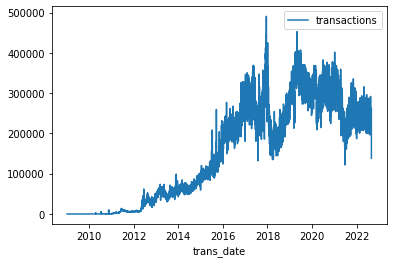

In [ ]:
CTE_results.set_index('trans_date').plot()

5) Write the query
It's time to step up the sophistication of your queries. Write a query that shows, for each hour of the day in the dataset, the corresponding number of trips and average speed.

Your results should have three columns:

- hour_of_day - sort by this column, which holds the result of extracting the hour from trip_start_timestamp.
- num_trips - the count of the total number of trips in each hour of the day (e.g. how many trips were started between 6AM and 7AM, independent of which day it occurred on).
- avg_mph - the average speed, measured in miles per hour, for trips that started in that hour of the day. Average speed in miles per hour is calculated as 3600 * SUM(trip_miles) / SUM(trip_seconds). (The value 3600 is used to convert from seconds to hours.)

Restrict your query to data meeting the following criteria:

a trip_start_timestamp between 2017-01-01 and 2017-07-01
trip_seconds > 0 and trip_miles > 0

- You will use a common table expression (CTE) to select just the relevant rides. 

Because this dataset is very big, this CTE should select only the columns you'll need to create the final output (though you won't actually create those in the CTE -- instead you'll create those in the later SELECT statement below the CTE).

In [ ]:
speeds_query = """
               WITH RelevantRides AS
               (
                   SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day, trip_miles, trip_seconds
                   FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                   WHERE trip_start_timestamp > '2017-01-01' AND 
                         trip_start_timestamp < '2017-07-01' AND 
                         trip_seconds > 0 AND 
                         trip_miles > 0
               )
               SELECT hour_of_day, 
                      COUNT(1) AS num_trips, 
                      3600 * SUM(trip_miles) / SUM(trip_seconds) AS avg_mph
               FROM RelevantRides
               GROUP BY hour_of_day
               ORDER BY hour_of_day
               """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
speeds_query_job = client.query(speeds_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
speeds_result = speeds_query_job.to_dataframe()

# View results
print(speeds_result)

    hour_of_day  num_trips    avg_mph
0             0     319339  20.230524
1             1     266529  18.937621
2             2     210147  18.777070
3             3     159668  20.158048
4             4     122183  26.736014
5             5     119312  30.769172
6             6     182738  24.588313
7             7     358406  17.735967
8             8     541775  15.079892
9             9     565548  16.543882
10           10     525120  18.539614
11           11     594603  18.928379
12           12     622324  17.838745
13           13     630181  17.671089
14           14     622465  16.974239
15           15     640430  15.688418
16           16     701435  14.283888
17           17     756627  12.462955
18           18     768251  13.646810
19           19     701064  16.642882
20           20     598614  19.536777
21           21     552726  20.433874
22           22     501095  19.531374
23           23     399587  19.877046


### JOIN
  Se os dados que queremos estiverem separados por diferentes tabelas podemos utilizar o comando **JOIN**. Exemplo:
  1. Pets table:
    - ID - ID number of the pet
    -  Name - Name of the pet
    - Animal - Type of animal

  2. Temos também outra table chamada Owners:
    - ID - ID number of the owner (differente from the ID number for the pet)
    - Name - Name of the owner
    - Pet_ID - ID number for the pet that belongs to the owner (wich matches the ID number for the pet in the **pets table**)

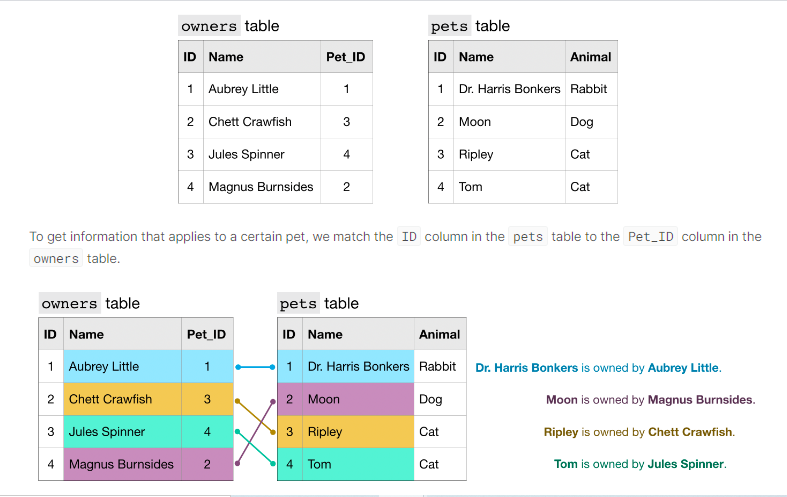

**Utilizando Join, podemos escrever uma query com duas colunas: nome do pet e nome do dono**

In [ ]:
query = """
        SELECT p.Name AS Pet_name, o.Name AS Owner_Name
        FROM `bigquery-public-data.pet_records.pets` AS p
        INNER JOIN `bigquery-public-data.pet_records.owners` AS o
          ON p.ID = o.Pet_ID

        """

Combinamos as informações de ambas as tabelas combinando as linhas em que a coluna ID na tabela pets corresponde à coluna Pet_ID na tabela proprietários.

**Sequência de código; 1º FROM e 2 INNER JOIN** 

Na consulta, ON determina qual coluna em cada tabela usar para combinar as tabelas. Observe que, como a coluna ID existe em ambas as tabelas, precisamos esclarecer qual usar. Usamos p.ID para fazer referência à coluna ID da tabela pets e o.Pet_ID refere-se à coluna Pet_ID da tabela owner.

Em geral, quando você está unindo tabelas, é um bom hábito especificar de qual tabela cada uma de suas colunas vem. Dessa forma, você não precisa puxar o esquema toda vez que voltar para ler a consulta.

O tipo de JOIN que estamos usando hoje é chamado de INNER JOIN. Isso significa que uma linha só será colocada na tabela de saída final se o valor nas colunas que você está usando para combiná-las aparecer nas duas tabelas que você está unindo. Por exemplo, se o número de ID 4 de Tom não existisse na tabela pets, obteríamos apenas 3 linhas de volta dessa consulta. Existem outros tipos de JOIN, mas um INNER JOIN é muito usado, então é um bom começo.

**Exemplo 01:** How many files are covered by each type of software license?

We'll work with two tables in the database. The first table is the licenses table, which provides the name of each GitHub repo (in the repo_name column) and its corresponding license.


In [ ]:
# First Table: License table

# Construct a reference to the "github_repos" dataset
github_dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
github_dataset = client.get_dataset(github_dataset_ref)

# Construct a reference to the "licenses" table
licenses_github_ref = github_dataset_ref.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_github_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(licenses_table, max_results=5).to_dataframe()

,repo_name,license
0,rcotrina94/icons,artistic-2.0
1,ology/Election-Viz,artistic-2.0
2,yyx990803/npm,artistic-2.0
3,Manwar/WWW-Google-DistanceMatrix,artistic-2.0
4,trizen/youtube-viewer,artistic-2.0


In [ ]:
# Second Table: sample_files table

# Construct a reference to the "licenses" table
files_ref = github_dataset_ref.table("sample_files")

# API request - fetch the table
files_table = client.get_table(files_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


**Query to determine the number of files per license, sorted by number of files**

In [ ]:
# repo_name é a coluna em comum entre as duas tabelas

query_git = """
        SELECT L.license, COUNT (1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L
          ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
"""

In [ ]:
# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
git_query_job = client.query(query_git, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
git_result = git_query_job.to_dataframe()

# View results
git_result #uma linha por licensa e a contagem dos números de arquivos (COUNT(1) como se fosse o ID de cada linha)

,license,number_of_files
0,mit,20542735
1,gpl-2.0,16610963
2,apache-2.0,7191927
3,gpl-3.0,5103751
4,bsd-3-clause,3458703
5,agpl-3.0,1362333
6,lgpl-2.1,798511
7,bsd-2-clause,692412
8,lgpl-3.0,577779
9,mpl-2.0,457028


**Outro comando útil: LIKE**
A cláusula WHERE pode limitar seus resultados a linhas com determinado texto usando o recurso LIKE. 
Você também pode usar % como um "curinga" para qualquer número de caracteres.
  
        - query = """
        - SELECT * 
        FROM `bigquery-public-data.pet_records.pets` 
        WHERE Name LIKE '%ipl%'  (qualquer texto que tenha ipl, como Ripley)
        """



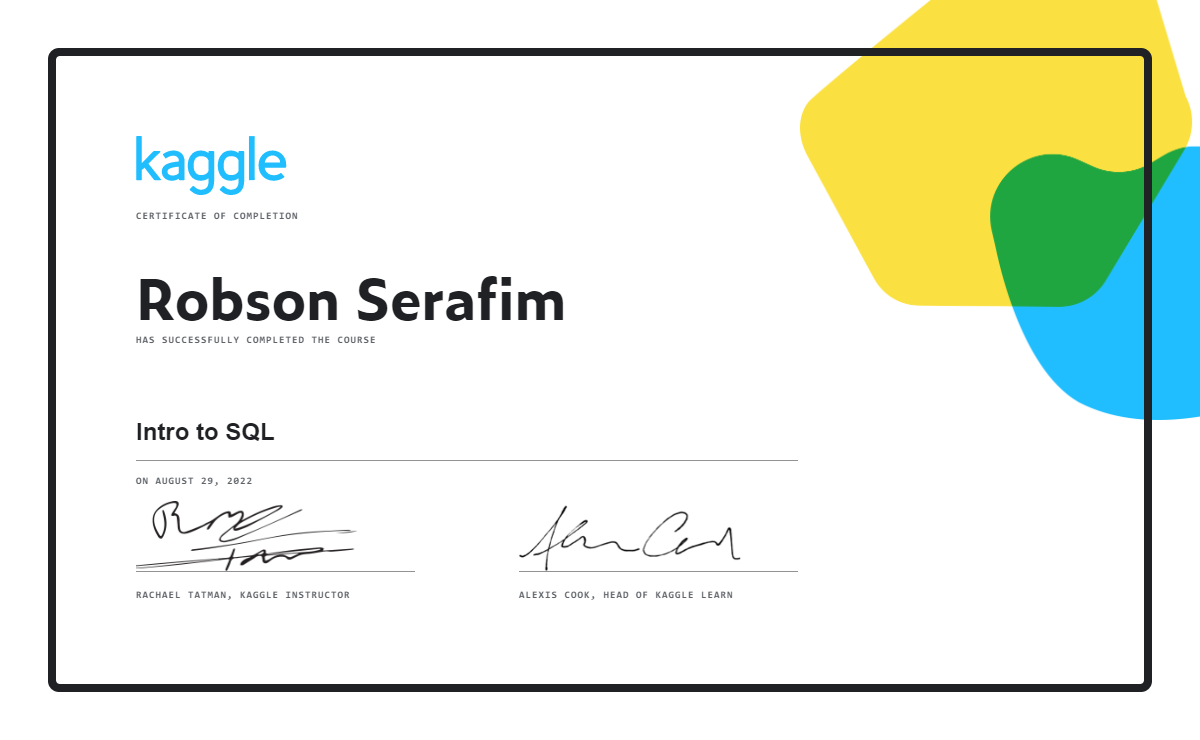